## 3. Exploring data tables with Pandas

1. Use Pandas to read the house prices data. How many columns and rows are there in this dataset?
2. The first step I usually do is to use commands like pandas.head() to print a few rows of data. Look around what kind of features are available and read data description.txt for more info. Try to understand as much as you can. Pick three features you think will be good predictors of house prices and explain what they are.
3. How many unique conditions are there in SaleCondition? Use Pandas to find out how many samples are labeled with each condition. What do you learn from doing this?
4. Select one variable you picked in b., do you want to know something more about that variable? Use Pandas to answer your own question and de- scribe what you did shortly here.

In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
data1 =pd.read_csv('train.csv')

In [3]:
print (data1)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    1192

In [4]:
#3.1
rows = 1460
colums = 81

In [5]:
#3.2 
#MSSubClass LotArea  LotFrontage เป็น Feature ที่มีผลกระทบต่อราคาบ้านค่อนข้างสูง

In [6]:
#3.3
for i in data1['SaleCondition'].unique():
    print (i)

Normal
Abnorml
Partial
AdjLand
Alloca
Family


In [7]:
#3.3
#6 unique 1.Normal 2.Abnormal 3.Partial 4.AdjLand 5.Alloca 6.Family

In [8]:
data1['LotArea'].mean()

10516.828082191782

In [9]:
#3.4 
# Pick 'LotArea'  อยากทราบค่าmeanของค่า Lot size in square feet เพื่อที่จะทราบว่าคนส่วนใหญ่ ชอบซื้อประมาณไหน 

## 4. Learning to explore data with Seaborn

1. Let us first look at the variable we want to predict SalePrice. Use Seaborn to plot histogram of sale prices. What do you notice in the histogram?
2. Plot the histogram of the LotArea variable. What do you notice in the histogram?
3. Use Seaborn to plot LotArea in the x-axis and SalePrice on the y-axis. Try plotting log(LotArea) versus log(SalePrice) and see if the plot looks better.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

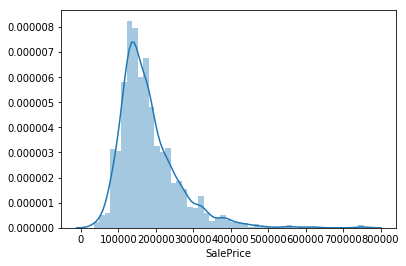

In [11]:
sns.distplot(data1['SalePrice']) 

#4.1 เราสามารถเห็นว่าคนส่วนใหญ่ซื้อประมาณในราคาช่วง 1-2แสน

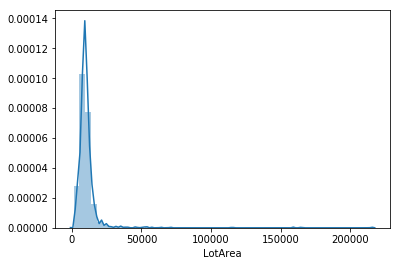

In [12]:
sns.distplot(data1['LotArea']) 

In [13]:
#4.2 จากรูป ทำให้เห้นค่า ของคนส่วนใหญ่ชอบความกว้างของ LotAreaประมาณไหน จากรูปจะเห็นได้อยู่ในช่วง 0- 5แสน และช่วง ประมาณ 1แสน-2แสน จะค่อนข้างสูง

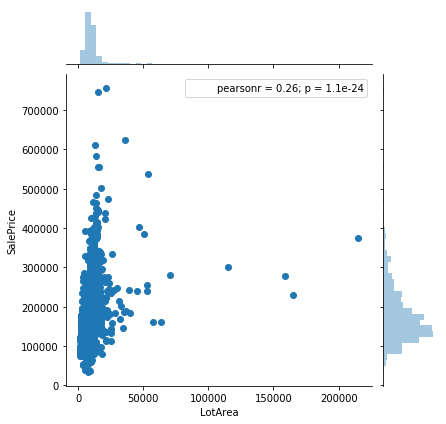

In [14]:
sns.jointplot(x= 'LotArea',y ='SalePrice',data = data1)

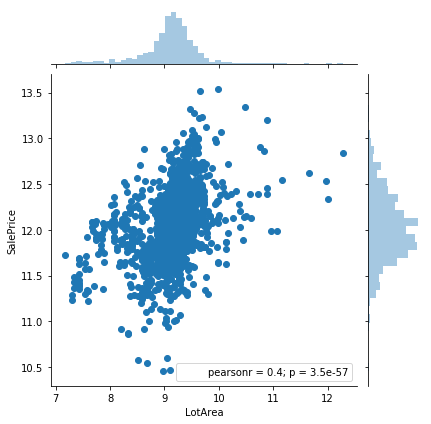

In [15]:
data1['LotArea'] =np.log(data1['LotArea'])
data1['SalePrice'] =np.log(data1['SalePrice'])
sns.jointplot(x= 'LotArea',y ='SalePrice',data = data1)

In [16]:
#4.3 จากรูปภาพข้างบนจะทำให้เห็นว่า ขอบ Scale ของค่า ทั้ง ภาพ2ภาพต่างกัน LotArea จะดูเล็กลงจนทำให้ค่าที่อยู่ใกล้กันกระจุกตัวกันมากขึ้น และไปอยู่ตรงกลางของกราฟ

## 5. Dealing with missing values

1. Suppose we want to start the first step of house price modeling by exploring the relationship between four variables: MSSubClass, LotArea, LotFrontage and SalePrice. I have done some exploring and found out that LotFrontage has a lot of missing values, so you need to fix it.
2. LotFrontage is the width of the front side of the property. Use Pandas to find out how many of the houses in our database is missing LotFrontage value.
3. Use Pandas to replace NaN values with another number. Since we are just exploring and not modeling yet, you can simply replace NaN with zeros for now.

In [17]:
data1[['MSSubClass','LotArea','LotFrontage','SalePrice']]

,MSSubClass,LotArea,LotFrontage,SalePrice
0,60,9.041922,65.0,12.247694
1,20,9.169518,80.0,12.109011
2,60,9.328123,68.0,12.317167
3,70,9.164296,60.0,11.849398
4,60,9.565214,84.0,12.429216
5,50,9.554993,85.0,11.870600
6,20,9.218705,75.0,12.634603
7,60,9.247829,NaN,12.206073
8,50,8.719317,51.0,11.774520
9,190,8.911934,50.0,11.678440


In [18]:
#5.1 more NaN in LotFrontage

In [19]:
#data1['LotFrontage'].mean()

In [20]:
#data1['LotFrontage'].fillna(70)

In [21]:
data1['LotFrontage'].isnull().sum()

259

In [22]:
#5.2 ใช้ คำสั่ง .isnull().sum() ทำให้มันรวมค่าทั้งหมดที่เป็นค่าที่ระบุไม่ได้ ให้ = 259

In [23]:
data1['LotFrontage']=data1['LotFrontage'].fillna(0)

In [24]:
print (data1['LotFrontage'])

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
5        85.0
6        75.0
7         0.0
8        51.0
9        50.0
10       70.0
11       85.0
12        0.0
13       91.0
14        0.0
15       51.0
16        0.0
17       72.0
18       66.0
19       70.0
20      101.0
21       57.0
22       75.0
23       44.0
24        0.0
25      110.0
26       60.0
27       98.0
28       47.0
29       60.0
        ...  
1430     60.0
1431      0.0
1432     60.0
1433     93.0
1434     80.0
1435     80.0
1436     60.0
1437     96.0
1438     90.0
1439     80.0
1440     79.0
1441      0.0
1442     85.0
1443      0.0
1444     63.0
1445     70.0
1446      0.0
1447     80.0
1448     70.0
1449     21.0
1450     60.0
1451     78.0
1452     35.0
1453     90.0
1454     62.0
1455     62.0
1456     85.0
1457     66.0
1458     68.0
1459     75.0
Name: LotFrontage, Length: 1460, dtype: float64


In [25]:
#5.3 จากโจทย์ ผมแทนค่า 0เข้าไปแทนที่ NaN ด้วยคำสั่ง.fillna(0)

## 6. Correlations between multiple variables

One incredible feature of Seaborn is the ability to create correlation grid with pairplot function. We want to create one single plot that show us how all variables are correlated.
1. First, you need to create a data table with four columns: MSSubClass, LotArea (with log function applied), LotFrontage (missing values replaced) and SalePrice (with log function applied).
2. Then, use pairplot to create a grid of correlation plots. What do you observe from this plot?

In [26]:
DATA_Create =data1[['MSSubClass','LotArea','LotFrontage','SalePrice']]

In [27]:
print (DATA_Create)
#6.1 จากข้อเก่าๆผมได้ทำให้ LotArea ,SalePrice เป็น logแล้ว และ ได้เติม LotFrontage จากค่า NaN ให้เป็น 0แล้ว

      MSSubClass    LotArea  LotFrontage  SalePrice
0             60   9.041922         65.0  12.247694
1             20   9.169518         80.0  12.109011
2             60   9.328123         68.0  12.317167
3             70   9.164296         60.0  11.849398
4             60   9.565214         84.0  12.429216
5             50   9.554993         85.0  11.870600
6             20   9.218705         75.0  12.634603
7             60   9.247829          0.0  12.206073
8             50   8.719317         51.0  11.774520
9            190   8.911934         50.0  11.678440
10            20   9.323669         70.0  11.771436
11            60   9.386308         85.0  12.751300
12            20   9.470240          0.0  11.877569
13            20   9.273503         91.0  12.540758
14            20   9.298351          0.0  11.964001
15            45   8.719317         51.0  11.790557
16            20   9.327323          0.0  11.911702
17            90   9.286468         72.0  11.407565
18          

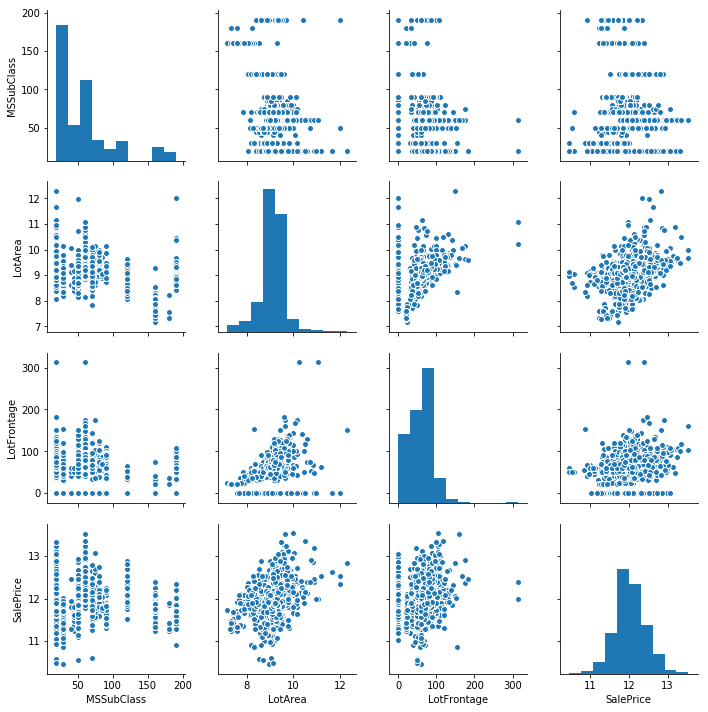

In [28]:
sns.pairplot(DATA_Create)

In [29]:
#6.2 หลังจากทำ Pairplotแล้ว จะได้เห้นความสัมพันธ์ของ graph แต่ละ Graph โดย ถ้าเป็น Column เดียวกัน ทั้ง แกน X และ Y จะได้เป้น HisTrogram ส่วนอืนๆจะเป็นจุด

## 7. Data Preparation

Let's prepare train.csv for model training

1. Pick columns that are numeric data and plot distributions of those data (with Seaborn). If you find a column with skewed distribution you will write a script to transform that column with a log function. Then standardize them.
2. For categorical variables, we will simply transform categorical data into numeric data by using function `pandas.get dummies()`.
3. Split data into x and y. The variable x contains all the house features except the SalePrice. y contains only the SalePrice.

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,4.189655,2.306769,5.283204,6.561031,0.000000,5.017280,6.753438,6.753438,6.751101,0.000000,...,1.098612,6.308098,0.000000,4.127134,0.000000,0.000000,0.000000,0.0,0.000000,2.583824
1,4.394449,2.319395,0.000000,6.886532,0.000000,5.652489,7.141245,7.141245,0.000000,0.000000,...,1.098612,6.133398,5.700444,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.573300
2,4.234107,2.334871,5.093750,6.188264,0.000000,6.075346,6.825460,6.825460,6.765039,0.000000,...,1.098612,6.411818,0.000000,3.761200,0.000000,0.000000,0.000000,0.0,0.000000,2.589054
3,4.110874,2.318881,0.000000,5.379897,0.000000,6.293419,6.629363,6.869014,6.629363,0.000000,...,1.386294,6.466145,0.000000,3.583519,5.609472,0.000000,0.000000,0.0,0.000000,2.553297
4,4.442651,2.357567,5.860786,6.486161,0.000000,6.196444,7.044033,7.044033,6.960348,0.000000,...,1.386294,6.729824,5.262690,4.442651,0.000000,0.000000,0.000000,0.0,0.000000,2.597433
5,4.454347,2.356599,0.000000,6.597146,0.000000,4.174387,6.680855,6.680855,6.340359,0.000000,...,1.098612,6.175867,3.713572,3.433987,0.000000,5.771441,0.000000,0.0,6.552508,2.554946
6,4.330733,2.324220,5.231109,7.222566,0.000000,5.762051,7.430707,7.435438,0.000000,0.000000,...,1.098612,6.456770,5.545177,4.060443,0.000000,0.000000,0.000000,0.0,0.000000,2.612611
7,0.000000,2.327066,5.484797,6.756932,3.496508,5.379897,7.010312,7.010312,6.891626,0.000000,...,1.098612,6.184149,5.463832,5.323010,5.433722,0.000000,0.000000,0.0,5.860786,2.580677
8,3.951244,2.274115,0.000000,0.000000,0.000000,6.859615,6.859615,6.930495,6.624065,0.000000,...,1.098612,6.150603,4.510860,0.000000,5.327876,0.000000,0.000000,0.0,0.000000,2.547453
9,3.931826,2.293740,0.000000,6.747587,0.000000,4.948760,6.899723,6.982863,0.000000,0.000000,...,0.693147,5.327876,0.000000,1.609438,0.000000,0.000000,0.000000,0.0,0.000000,2.539903


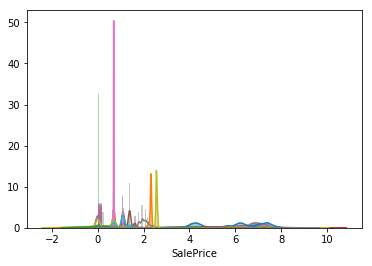

In [30]:
#data1.skew()
Numeric_data = data1.select_dtypes(include = ['int8','int16','int32','int64','float16','float32','float64'])
Cat_dat = ['Id','MSSubClass','MoSold','YrSold','OverallQual','OverallCond','YearBuilt','YearRemodAdd','GarageYrBlt']
Column_new = Numeric_data.drop(columns=Cat_dat)
for i in Column_new.columns:
    Column_new[i] = Column_new[i].fillna(Column_new[i].mean())
    Column_new[i] =np.log(Column_new[i]+1)
    sns.distplot(Column_new[i])
Column_new

In [31]:
#7.1 แยก Data ที่ไม่ใช่ Numeric data ออก  และเติมค่า mean ของค่าๆนั้นๆเมื่อเจอค่าที่หาค่าไม่ได้  และหลังจากนั้น แปลงเป็น log function ทั้งหมด

In [32]:
from sklearn import preprocessing

In [33]:
Cat= data1.select_dtypes(exclude = ['int8','int16','int32','int64','float16','float32','float64'])
Columndown = data1[Cat_dat]
ConCad_dat = pd.concat([Columndown,Cat],axis =1)
Dummie = pd.get_dummies(ConCad_dat)
Dummie

,Id,MSSubClass,MoSold,YrSold,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageYrBlt,MSZoning_C (all),...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,2,2008,7,5,2003,2003,2003.0,0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,5,2007,6,8,1976,1976,1976.0,0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,9,2008,7,5,2001,2002,2001.0,0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,2,2006,7,5,1915,1970,1998.0,0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,12,2008,8,5,2000,2000,2000.0,0,...,0,0,0,1,0,0,0,0,1,0
5,6,50,10,2009,5,5,1993,1995,1993.0,0,...,0,0,0,1,0,0,0,0,1,0
6,7,20,8,2007,8,5,2004,2005,2004.0,0,...,0,0,0,1,0,0,0,0,1,0
7,8,60,11,2009,7,6,1973,1973,1973.0,0,...,0,0,0,1,0,0,0,0,1,0
8,9,50,4,2008,7,5,1931,1950,1931.0,0,...,0,0,0,1,1,0,0,0,0,0
9,10,190,1,2008,5,6,1939,1950,1939.0,0,...,0,0,0,1,0,0,0,0,1,0


In [34]:
#7.2 change categorical Variable to numeric with .getdummies() 

In [35]:
x = Column_new.drop(columns= ['SalePrice'],axis=1)
y = Column_new['SalePrice']
#7.3 X except SalePrice  , Y Only SalePrice
print (x,y)

      LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0        4.189655  2.306769    5.283204    6.561031    0.000000   5.017280   
1        4.394449  2.319395    0.000000    6.886532    0.000000   5.652489   
2        4.234107  2.334871    5.093750    6.188264    0.000000   6.075346   
3        4.110874  2.318881    0.000000    5.379897    0.000000   6.293419   
4        4.442651  2.357567    5.860786    6.486161    0.000000   6.196444   
5        4.454347  2.356599    0.000000    6.597146    0.000000   4.174387   
6        4.330733  2.324220    5.231109    7.222566    0.000000   5.762051   
7        0.000000  2.327066    5.484797    6.756932    3.496508   5.379897   
8        3.951244  2.274115    0.000000    0.000000    0.000000   6.859615   
9        3.931826  2.293740    0.000000    6.747587    0.000000   4.948760   
10       4.262680  2.334439    0.000000    6.810142    0.000000   4.905275   
11       4.454347  2.340488    5.659482    6.906755    0.000000 

## 8. Let us first fit a very simple linear regression model, just to see what we get.

1. Use import LinearRegression from sklearn.linear model and use function `fit()` to fit the model.
2. Use function `predict()` to get house price predictions from the model (let’s call the predicted house prices yhat).
3. Plot `y` against `yhat` to see how good your predictions are.

In [36]:
from sklearn import linear_model

In [37]:
Data_LineReg = linear_model.LinearRegression()
Data_Linefit = Data_LineReg.fit(x,y)
print (Data_Linefit)
#8.1 use fit to fit model LinearRegression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [51]:
yhat = Data_Linefit.predict(x)
yhat2 = Data_LineReg.predict(x)
print (yhat)
#8.2 predict house prices with LinearRegression model equal yhat [2.58400315 2.57481799 2.5877421  ... 2.57729059 2.54419389 2.5616654 ]

[2.58400315 2.57481799 2.5877421  ... 2.57729059 2.54419389 2.5616654 ]


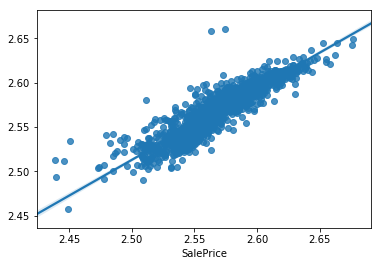

In [39]:
sns.regplot(x = y,y=yhat,data=data1)
#8.3 plot data with y against yhat

## 9. Assessing Your Model

According to Kaggle’s official rule on this problem, they use root mean square errors (rmse) to judge the accuracy of our model. This error computes the dif- ference between the log of actual house prices and the log of predicted house price. Find the mean and squareroot them.

We want to see how we compare to other machine learning contestants on Kag- gle so let us compute our rmse. Luckily, sklearn has done most of the work for you by providing mean square error function. You can use it by importing the function from sklearn.metrics. Then, you can compute mean square error and take a squareroot to get rmse.

What’s the rmse of your current model? Check out Kaggle Leaderboard for this problem to see how your number measures up with the other contestants.

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
root_mean = np.sqrt(mean_squared_error(y,yhat))
print (root_mean)

0.013526154149753134


In [50]:
#9 it Room mean Sqaure error  = 0.013526154149753134  from y againts yhat

## 10. Cross Validation

As we discussed earlier, don’t brag about your model’s accuracy until you have performed cross validation. Let us check cross-validated performance to avoid embarrassment.

Luckily, scikit learn has done most of the work for us once again. You can use the function `cross_val_predict()` to train the model with cross validation method and output the predictions.

What’s the rmse of your cross-validated model? Discuss what you observe in your results here. You may try plotting this new yhat with y to get better insights about this question.

In [43]:
from sklearn import datasets,linear_model

In [44]:
from sklearn.model_selection import cross_val_predict

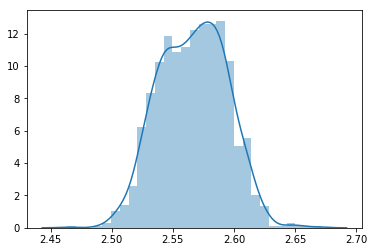

In [45]:
Predict_cross = cross_val_predict(Data_Linefit,x,y)
sns.distplot(Predict_cross)

In [46]:
Predict_cross

array([2.5827847 , 2.57504129, 2.58578173, ..., 2.57913513, 2.54371586,
       2.56422615])

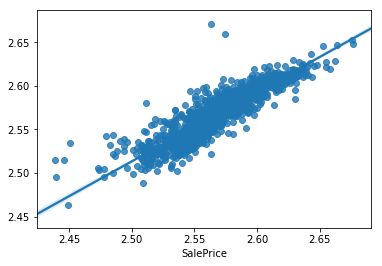

In [47]:
sns.regplot( x= y , y=Predict_cross,data= data1)

In [49]:
#10 rmse is rootmeansquare error  it equae Predict_cross is ([2.5827847 , 2.57504129, 2.58578173, ..., 2.57913513, 2.54371586,2.56422615] 
#and we plot with new yhat with Precit_cross is CrossValidation predict fuction 

## 11 (Optional) Fit Better Models
There are other models you can fit that will perform better than linear regres- sion. For example, you can fit linear regression with L2 regularization. This class of models has a street name of ‘Ridge Regression’ and sklearn simply called them Ridge. As we learned last time, this model will fight overfitting problem. Furthermore, you can try linear regression with L1 regularization (street name Lasso Regression or Lasso in sklearn). Try these models and see how you com- pare with other Kagglers now. You can write about your findings below.